## TD0 

In [1]:
import numpy as np
import random
random.seed(123)

In [2]:
walk_states = list(range(7))
walk_state_keys = ['L', 'A', 'B', 'C', 'D', 'E', 'R']
start_index = walk_state_keys.index('C')
terminal_state1 = walk_state_keys.index('L')
terminal_state2 = walk_state_keys.index('R')
print(len(walk_state_keys), len(walk_states), terminal_state1, terminal_state2)
# def run_epsiode(V_s, start_index, states):
print(walk_state_keys)

7 7 0 6
['L', 'A', 'B', 'C', 'D', 'E', 'R']


In [3]:
import numpy as np
import random
import matplotlib.pyplot as plt
random.seed(123)

In [4]:
def run_episode_TD(Vs, walk_state_keys=walk_state_keys, walk_states=walk_states, alpha=0.1):    
#     Vs[1:6] += 0.5
    done  = False
#     cur_state = walk_state_keys.index('C')
    cur_state = 3
    action_list = [-1, 1]
    
    while not done:
        action = random.choice(action_list)
        
        s_= action + cur_state
        
        if s_ == terminal_state1:
            reward = 0
            Vs[cur_state] = Vs[cur_state] + alpha *  (reward + Vs[s_] - Vs[cur_state])
            done = True
            
        elif s_ == terminal_state2:
            reward = 1
            Vs[cur_state] = Vs[cur_state] + alpha *  (reward + Vs[s_] - Vs[cur_state])
            done = True
            
        else:
            reward = 0
            Vs[cur_state] = Vs[cur_state] + alpha *  (reward + Vs[s_] - Vs[cur_state])
            done = False
        
        cur_state = s_
    return Vs

In [9]:
import matplotlib.pyplot as plt


<Figure size 720x720 with 0 Axes>

['L', 'A', 'B', 'C', 'D', 'E', 'R']


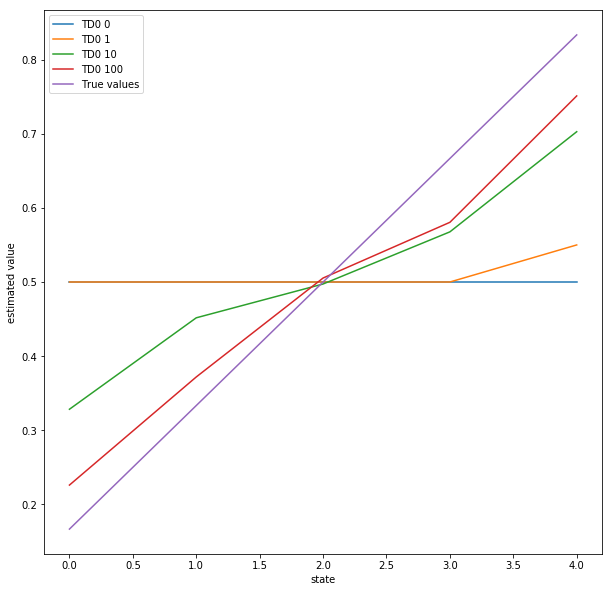

In [11]:
# Vs = np.zeros(len(walk_state_keys))
true_values = [0, 1/6, 2/6, 3/6, 4/6, 5/6, 0]
episode_list = [0 ,1, 10, 100]
fig = plt.figure(figsize=(10,10))
print(walk_state_keys)
for i in episode_list:
#     Vs = [0.5]*len(walk_state_keys)

#     print('Runing for', i)
    if i == 0:
        Vs = np.zeros(len(walk_state_keys))
        Vs[1:6] = 0.5
    for eps in range(i):
        Vs = run_episode_TD(Vs)
#         print(Vs)
    plt.plot(Vs[1:6],label='TD0 {}'.format(i))

plt.plot( true_values[1:6], label='True values')
plt.xlabel('state')
plt.ylabel('estimated value')
plt.legend()
plt.show()

Alpha MC and TD 0 Sum of Rewards

In [13]:
def alphaMC(num_episodes=101, alpha=0.01):
    v_s = np.zeros(len(walk_state_keys))
    v_s[1:6] = 0.5
#     print(v_s)
#     alpha = 0.01
    vs_vals = []
    
    for episode in range(num_episodes):
        G = 0
        ep_states, ep_rewards, ep_actions = generate_episode_alpha()
        for i in reversed(range(len(ep_states))):
            st = ep_states[i]
            G += ep_rewards[i]
            
            v_s[st] = v_s[st] + alpha*(G - v_s[st])
#         print(v_s)
        vs_vals.append(np.copy(v_s))
#     vs_vals.reverse()

    return v_s, vs_vals

In [ ]:
V, Vall = alphaMC(1000)

In [14]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
epstates, eprewards, epactions = generate_episode_alpha()
print(eprewards)
print(epactions)
print(epstates)
print(len(epstates), len(eprewards), len(actions))

In [15]:
def td_val(num_episodes, alpha=0.1):
#     print('Running for', num_episodes)
    Vs_vals = []
    Vs_td = np.zeros(len(walk_state_keys))
    Vs_td[1:6] = 0.5
#     Vs = [0.5]*len(walk_st reversedate_keys)
    for eps in range(num_episodes):
        Vs_td = run_episode_TD(Vs_td, alpha=alpha)
        Vs_vals.append(np.copy(Vs_td))
    return Vs_td, Vs_vals


    

In [ ]:
import numpy as np

In [16]:
walk_states = list(range(7))
walk_state_keys = ['L', 'A', 'B', 'C', 'D', 'E', 'R']
start_index = walk_state_keys.index('C')
terminal_state1 = walk_state_keys.index('L')

terminal_state2 = walk_state_keys.index('R')
print(terminal_state1, terminal_state2)
true_values = [0, 1/6, 2/6, 3/6, 4/6, 5/6, 0]
def generate_episode_alpha(walk_state_keys=walk_state_keys, walk_states=walk_states):
    
    
    done  = False
    cur_state = walk_state_keys.index('C')
#     print('start ', cur_state)
    action_list = [-1, 1]
    rewards = []
    actions = []
    states = []
    
    while not done:
        
        action = random.choice(action_list)
        
        states.append(cur_state)
        next_state = action + cur_state
        
#         if next_state < 0 :
#             print(cur_state, action)
        
        if next_state == terminal_state1:
            reward = 0
            rewards.append(reward)
            done = True

        elif next_state == terminal_state2:
            reward = 1
            rewards.append(reward)
            done = True
        else:
            reward = 0
            done = False
            rewards.append(reward)
        actions.append(action)
        cur_state = next_state
    return states, rewards, actions
        
        

0 6


In [10]:
import numpy as np
import random

In [64]:
epstates, eprewards, epactions = generate_episode_alpha()
print(len(epstates), len(eprewards), len(epactions))
print('States', epstates)
print('Rewards', eprewards)
print('Actions', epactions)

start  3
5 5 5
States [3, 4, 3, 2, 1]
Rewards [0, 0, 0, 0, 0]
Actions [1, -1, -1, -1, -1]


In [11]:
import matplotlib.pyplot as plt

(100,)
(100, 7)


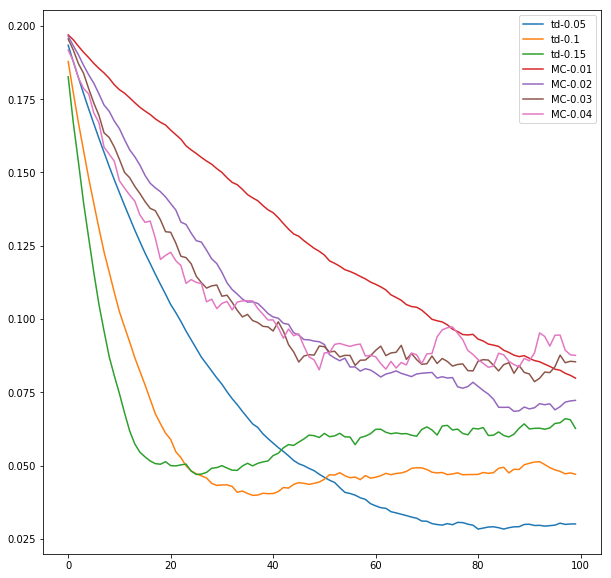

In [118]:
# print(true_values)
# errors_td = []
# errors_mc = []
alphas_mc = [0.01, 0.02, 0.03, 0.04]
# Vs_alpha, Vs_alphavals = alphaMC(1001, alpha=0.05)
# print(Vs_alphavals)
# print(np.array(Vs_alphavals).shape)
# for alpha in alphas_mc[:1]:
#     Vs_alpha, Vs_alphavals = alphaMC(1001, alpha=alpha)
#     error_val = []
#     for i in range(len(Vs_alphavals[:100])):
#         error_m = np.sum((np.array(Vs_alphavals[i]) - true_values)**2)**0.5 / 5
#         error_val.append(error_m)
#     plt.plot(error_val)
figure = plt.figure(figsize=(10,10))
alphas_td = [0.05, 0.10, 0.15]
for alpha in alphas_td:
    ALPHA_ERRORS = np.zeros((100,100))
    for j in range(100):
        _, vs_all = td_val(100, alpha=alpha)
        vs_errors = []
        for i in range(len(vs_all)):
            error_t = np.average((np.array(vs_all[i]) - true_values)**2)**0.5
            vs_errors.append(error_t)
        ALPHA_ERRORS[j] = np.array(vs_errors)
    ALPHA_ERRORS = np.mean(ALPHA_ERRORS, axis=0)
    plt.plot(ALPHA_ERRORS, label='td-{}'.format(alpha))
plt.legend()
# plt.show()

for alpha in alphas_mc:
    ALPHA_ERRORS = np.zeros((100,100))
    for j in range(100):
        _, vs_all = alphaMC(100, alpha=alpha)
        vs_errors = []
        for i in range(len(vs_all)):
            error_t = np.average((np.array(vs_all[i]) - true_values)**2)**0.5
            vs_errors.append(error_t)
        ALPHA_ERRORS[j] = np.array(vs_errors)
    ALPHA_ERRORS = np.mean(ALPHA_ERRORS, axis=0)
    plt.plot(ALPHA_ERRORS, label='MC-{}'.format(alpha))
print(np.array(ALPHA_ERRORS).shape)
print(np.array(vs_all).shape)
# plt.plot(ALPHA_ERRORS, label='alpha-MC-{}'.format(alpha))
plt.legend()
plt.show()

(100,)
(100, 7)


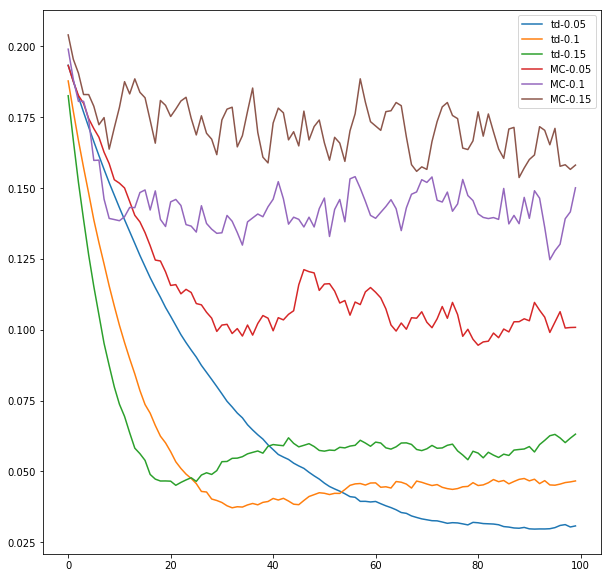

In [17]:
# print(true_values)
# errors_td = []
# errors_mc = []
alphas_mc = [0.01, 0.02, 0.03, 0.04]
# Vs_alpha, Vs_alphavals = alphaMC(1001, alpha=0.05)
# print(Vs_alphavals)
# print(np.array(Vs_alphavals).shape)
# for alpha in alphas_mc[:1]:
#     Vs_alpha, Vs_alphavals = alphaMC(1001, alpha=alpha)
#     error_val = []
#     for i in range(len(Vs_alphavals[:100])):
#         error_m = np.sum((np.array(Vs_alphavals[i]) - true_values)**2)**0.5 / 5
#         error_val.append(error_m)
#     plt.plot(error_val)
figure = plt.figure(figsize=(10,10))
alphas_td = [0.05, 0.10, 0.15]
for alpha in alphas_td:
    ALPHA_ERRORS = np.zeros((100,100))
    for j in range(100):
        _, vs_all = td_val(100, alpha=alpha)
        vs_errors = []
        for i in range(len(vs_all)):
            error_t = np.average((np.array(vs_all[i]) - true_values)**2)**0.5
            vs_errors.append(error_t)
        ALPHA_ERRORS[j] = np.array(vs_errors)
    ALPHA_ERRORS = np.mean(ALPHA_ERRORS, axis=0)
    plt.plot(ALPHA_ERRORS, label='td-{}'.format(alpha))
plt.legend()
# plt.show()

for alpha in alphas_td:
    ALPHA_ERRORS = np.zeros((100,100))
    for j in range(100):
        _, vs_all = alphaMC(100, alpha=alpha)
        vs_errors = []
        for i in range(len(vs_all)):
            error_t = np.average((np.array(vs_all[i]) - true_values)**2)**0.5
            vs_errors.append(error_t)
        ALPHA_ERRORS[j] = np.array(vs_errors)
    ALPHA_ERRORS = np.mean(ALPHA_ERRORS, axis=0)
    plt.plot(ALPHA_ERRORS, label='MC-{}'.format(alpha))
print(np.array(ALPHA_ERRORS).shape)
print(np.array(vs_all).shape)
# plt.plot(ALPHA_ERRORS, label='alpha-MC-{}'.format(alpha))
plt.legend()
plt.show()

0.06437636374181836
(100,)
(100, 7)
0.2096872899379963


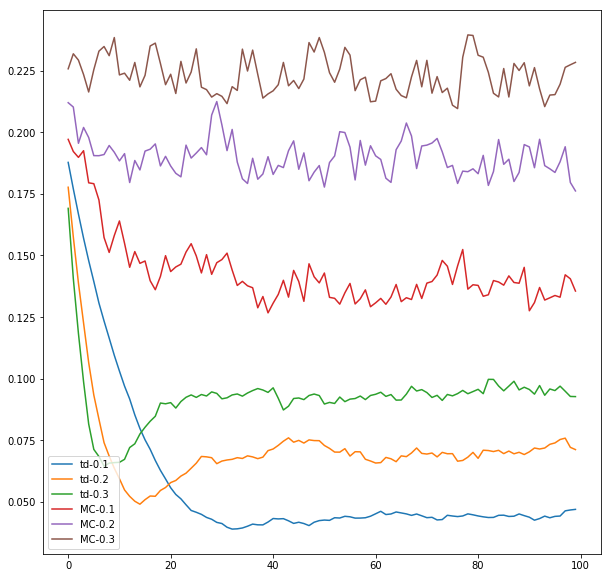

In [23]:
alphas_mc = [0.01, 0.02, 0.03, 0.04]
# Vs_alpha, Vs_alphavals = alphaMC(1001, alpha=0.05)
# print(Vs_alphavals)
# print(np.array(Vs_alphavals).shape)
# for alpha in alphas_mc[:1]:
#     Vs_alpha, Vs_alphavals = alphaMC(1001, alpha=alpha)
#     error_val = []
#     for i in range(len(Vs_alphavals[:100])):
#         error_m = np.sum((np.array(Vs_alphavals[i]) - true_values)**2)**0.5 / 5
#         error_val.append(error_m)
#     plt.plot(error_val)
figure = plt.figure(figsize=(10,10))
alphas_td = [0.1, 0.2, 0.3]
for alpha in alphas_td:
    ALPHA_ERRORS = np.zeros((100,100))
    for j in range(100):
        _, vs_all = td_val(100, alpha=alpha)
        vs_errors = []
        for i in range(len(vs_all)):
            error_t = np.average((np.array(vs_all[i]) - true_values)**2)**0.5
            vs_errors.append(error_t)
        ALPHA_ERRORS[j] = np.array(vs_errors)
    ALPHA_ERRORS = np.mean(ALPHA_ERRORS, axis=0)
    plt.plot(ALPHA_ERRORS, label='td-{}'.format(alpha))
plt.legend()
# plt.show()
print(min(ALPHA_ERRORS))
for alpha in alphas_td:
    ALPHA_ERRORS = np.zeros((100,100))
    for j in range(100):
        _, vs_all = alphaMC(100, alpha=alpha)
        vs_errors = []
        for i in range(len(vs_all)):
            error_t = np.average((np.array(vs_all[i]) - true_values)**2)**0.5
            vs_errors.append(error_t)
        ALPHA_ERRORS[j] = np.array(vs_errors)
    ALPHA_ERRORS = np.mean(ALPHA_ERRORS, axis=0)
    plt.plot(ALPHA_ERRORS, label='MC-{}'.format(alpha))
print(np.array(ALPHA_ERRORS).shape)
print(np.array(vs_all).shape)
# plt.plot(ALPHA_ERRORS, label='alpha-MC-{}'.format(alpha))
print(min(ALPHA_ERRORS))
plt.legend()
plt.show()

In [ ]:
fig = plt.figure(figsize=(10,10))
plt.plot(errors_mc, label='alpha mc')
plt.plot(errors_td, label='TD0')
plt.legend()
plt.show()